In [4]:
setwd('D:/Project/project_yangjy_NR/4.Postprocess/')
suppdir="D:/Project/project_yangjy_NR/4.Postprocess/"

library(ComplexHeatmap)
library(ggplot2)
library(ggpubr)
library(ggrepel)
library(dplyr)
library(ggsci)
library(openxlsx)
library(reshape2)
library(cowplot)
library(ggpmisc)

载入需要的程辑包：grid

ComplexHeatmap version 2.8.0
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite:
Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
  genomic data. Bioinformatics 2016.

The new InteractiveComplexHeatmap package can directly export static 
complex heatmaps into an interactive Shiny app with zero effort. Have a try!

This message can be suppressed by:
  suppressPackageStartupMessages(library(ComplexHeatmap))


Warning message:
"程辑包'ggplot2'是用R版本4.1.3 来建造的"
Warning message:
"程辑包'ggpubr'是用R版本4.1.3 来建造的"
Warning message:
"程辑包'ggrepel'是用R版本4.1.3 来建造的"
Warning message:
"程辑包'dplyr'是用R版本4.1.3 来建造的"

载入程辑包：'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, s

In [ ]:
#fig4b

In [2]:
library(xlsxjars)
library(rJava)
library(xlsx)

In [5]:
###########load data
## ITD detected by ampliseq
ampITD<-read.xlsx("D:/Project/project_yangjy_NR/FLT3-Project/results/target/Ampliseq/Results/ITD/All.ITD.xlsx",2,encoding = "UTF-8",header = F) 
head(ampITD)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36
,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,...,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,patient1,1a,21,28608255,.,G,GATCATATTCATATTCTCTGAA,.,PASS,END=28608255;HOMLEN=25;HOMSEQ=ATCATATTCATATTCTCTGAAATCA;SVLEN=21;SVTYPE=INS,...,ATCATATTCATATTCTCTGAAATCA,25,21,1,真,0,0,594,600,601
2,patient1,1b,39,28608254,.,A,AGATCATATTCATATTCTCTGAAATCAACGTAGAAGTTGG,.,PASS,END=28608254;HOMLEN=36;HOMSEQ=GATCATATTCATATTCTCTGAAATCAACGTAGAAGT;SVLEN=39;SVTYPE=INS,...,GATCATATTCATATTCTCTGAAATCAACGTAGAAGT,36,39,1,真,1,2,590,600,601
3,patient1,1c,48,28608220,.,A,AAACTCTAAATTTTCTCTTGGAAACTCCCATTTGAGATCATATTCCGCC,.,PASS,END=28608220;HOMLEN=44;HOMSEQ=AACTCTAAATTTTCTCTTGGAAACTCCCATTTGAGATCATATTC;SVLEN=48;SVTYPE=INS,...,AACTCTAAATTTTCTCTTGGAAACTCCCATTTGAGATCATATTC,44,48,1,真,1,2,598,611,612
4,patient1,1d,54,28608262,.,T,TTCATATTCTCTGAAATCAACGTAGAAGTACTCATTATCTGAGGAGCCGGCCCCC,.,PASS,END=28608262;HOMLEN=49;HOMSEQ=TCATATTCTCTGAAATCAACGTAGAAGTACTCATTATCTGAGGAGCCGG;SVLEN=54;SVTYPE=INS,...,TCATATTCTCTGAAATCAACGTAGAAGTACTCATTATCTGAGGAGCCGG,49,54,1,真,1,3,583,597,598
5,patient1,1e,66,28608220,.,A,AAACTCTAAATTTTCTCTTGGAAACTCCCATTTGAGATCATATTCATATTCTCTGAAATCAACGCCC,.,PASS,END=28608220;HOMLEN=63;HOMSEQ=AACTCTAAATTTTCTCTTGGAAACTCCCATTTGAGATCATATTCATATTCTCTGAAATCAACG;SVLEN=66;SVTYPE=INS,...,AACTCTAAATTTTCTCTTGGAAACTCCCATTTGAGATCATATTCATATTCTCTGAAATCAACG,63,45,1,真,1,2,592,611,612
6,patient1,1f,75,28608253,.,G,GAGATCATATTCATATTCTCTGAAATCAACGTAGAAGTACTCATTATCTGAGGAGCCGGTCACCTGTACCATCTGT,.,PASS,END=28608253;HOMLEN=77;HOMSEQ=AGATCATATTCATATTCTCTGAAATCAACGTAGAAGTACTCATTATCTGAGGAGCCGGTCACCTGTACCATCTGTAG;SVLEN=75;SVTYPE=INS,...,AGATCATATTCATATTCTCTGAAATCAACGTAGAAGTACTCATTATCTGAGGAGCCGGTCACCTGTACCATCTGTAG,77,75,1,真,1,0,576,600,601


,X1,X2,X14,X17,X20,pts
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
1,patient1,1a,5.6197714,2.2348457,0.4017187,1
2,patient1,1b,8.7265316,12.3500637,15.4598826,1
3,patient1,1c,1.4481148,3.1761309,0.4645639,1
4,patient1,1d,0.2631934,0.4263094,0.3251180,1
5,patient1,1e,30.1121575,27.9051819,2.6676230,1
6,patient1,1f,0.3976277,0.4717699,0.9724924,1


,X1,X2,X14,X17,X20,pts
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
1,patient1,1a,5.6197714,2.2348457,0.4017187,1
2,patient1,1b,8.7265316,12.3500637,15.4598826,1
3,patient1,1c,1.4481148,3.1761309,0.4645639,1
4,patient1,1d,0.2631934,0.4263094,0.3251180,1
5,patient1,1e,30.1121575,27.9051819,2.6676230,1
6,patient1,1f,0.3976277,0.4717699,0.9724924,1


,X1,X2,X14,X17,X20,pts
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
8,patient3,3a,30.39449,0.01680672,0.05336179,3
9,patient3,3b,18.18615,45.69536424,88.45772378,3


,X1,X2,X14,X17,X20,pts
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
11,patient5,5a,0.07418742,3.7113973,13.160503,5
12,patient5,5b,0.62252144,9.7071619,19.919188,5
13,patient5,5c,0.25917527,6.9521579,15.991321,5
14,patient5,5d,0.04174397,0.5720006,1.531910,5
15,patient5,5e,0.05104408,0.9968670,1.199311,5


,X1,X2,X14,X17,X20,pts
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
16,patient6,6a,0.70288754,11.3852249,42.9602133,6
17,patient6,6b,0.01530280,0.6009191,0.0000000,6
18,patient6,6c,0.06118313,0.3694893,0.1281582,6


,X1,X2,X14,X17,X20,pts
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
7,patient2,2a,0.4897799,44.24897,88.22865,2


,X1,X2,X14,X17,X20,pts
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
10,patient4,4a,8.521179,19.84568,39.19055,4


null device 
          1

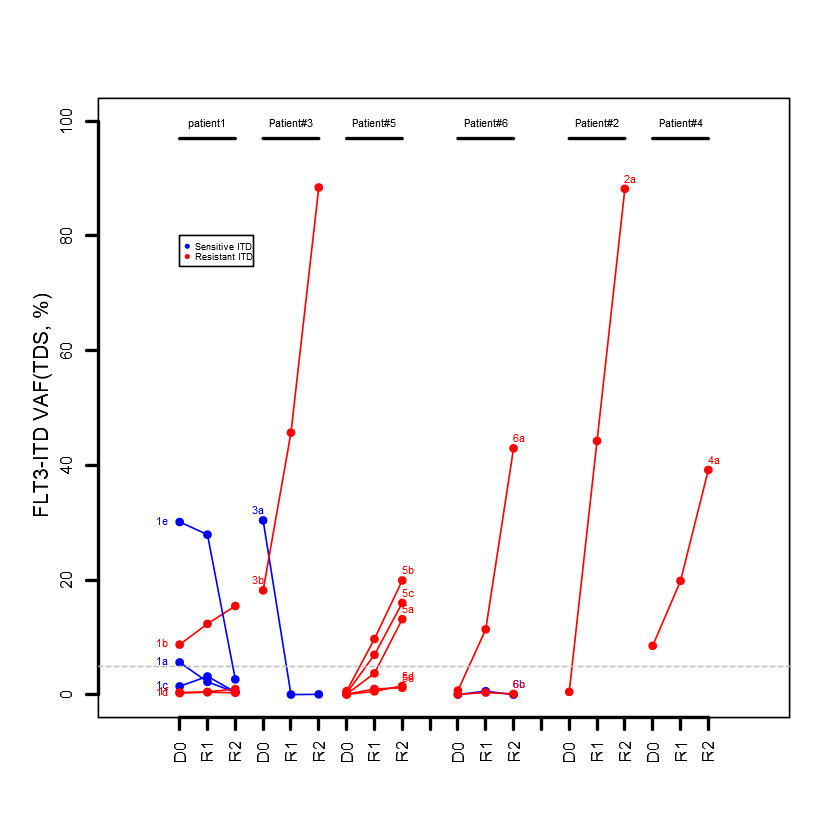

In [14]:
library(plotrix)
#pdf("ITDdynamicsof6Patients-ampliseq_rename.pdf",width =7,height = 5)
plot(x=c(1,2,3),y=c(9.05,15.1,16.8),pch=20,type="o",col="white",
     ylim=c(0,100),xlim=c(-1,22),ylab="",xlab="",xaxt="n",yaxt="n")


#NR1 ITD#21
##########修改X轴
#xlab=c("Day1","Day29","Day66",
#       "Day1","Day233","Day294",
#       "Day1","Day42","Day69"," ",
#       "Day1","Day77","Day141"," ",
#       "Day1","Day119","Day160",
#       "Day1","Day58","Day96"
#       )
xlab=c("D0","R1","R2",
       "D0","R1","R2",
       "D0","R1","R2"," ",
       "D0","R1","R2"," ",
       "D0","R1","R2",
       "D0","R1","R2"
       )
axis(1,at=1:20,labels=xlab,las=3,cex.axis=0.8,cex.lab=0.5,
     col = "black", lty = 1, lwd = 2,col.axis = "black")

axis(2,at=c(0,20,40,60,80,100),labels=c(0,20,40,60,80,100),las=3,cex.axis=0.8,cex.lab=0.6,
     col = "black", lty = 1, lwd = 2,col.axis = "black")
#mtext("VAF of ITD by ampliseq",side = 2,line=2)
mtext("FLT3-ITD VAF(TDS, %)",side = 2,line=2)
#axis(4,at=c(0,20,40,60,80,100),labels=c(0,20,40,60,80,100),las=3,cex.axis=0.8,cex.lab=0.6,
#     col = "grey50", lty = 1, lwd = 2,col.axis = "grey20")
#mtext("%Blast in Bone marrow",side = 4,line=1.3)
#legend("topright",legend = c("%Blast","Sensitive ITD","Resistant ITD"), pch = c(15,20,20),cex=0.4,col=c("grey50","blue","red"))
legend(x = 1,y=80,legend = c("Sensitive ITD","Resistant ITD"), pch = c(20,20),cex=0.4,col=c("blue","red"))
#text(1:dim(y)[1],y$fre+5,srt=90,labels=y$pro,srt=80,pos=3,cex=0.5)

##defined col
col<-function(x){
  if(x[3]>x[1]){
    y<-"red"
  }else{
    y<-"blue"
  }
  y
}

itd<-ampITD[,c(1,2,14,17,20)]
pts<-substr(ampITD$X1,8,8) #extract patients id
itd$pts<-pts
head(itd)

ptspos<-c(97,97,97)
#NR1
##NR1:
times<-c(1,2,3)
#NR1blast=c(64,94,34.8)
#points(x=times,y=NR1blast,pch=15,col="grey50",cex=1)
#lines(x=times,y=NR1blast,pch=15,col="grey50",lty=1,lwd=3)
lines(x=times,y=ptspos,pch=15,col="black",lty=1,lwd=2)
text(times[2],ptspos[2],labels="patient1",pos=3,cex=0.5)
##itd plot in pts1
data<-itd[which(itd$pts==1),]
head(data)
for (i in 1:dim(data)[1]) {
  vaf<-data[i,c(3,4,5)]
  points(x=times,y=vaf,pch=20,col=col(vaf),cex=1)
  lines(x=times,y=vaf,pch=20,col=col(vaf),cex=1)
  text(times[1],vaf[1],labels=data$X2[i],pos=2,cex=0.5,col = col(vaf))
}

#NR5 pt3
times<-c(4,5,6)
#NR5blast=c(65,61,93)
#points(x=times,y=NR5blast,pch=15,col="grey50",cex=1)
#lines(x=times,y=NR5blast,pch=15,col="grey50",lty=1,lwd=3)
lines(x=times,y=ptspos,pch=15,col="black",lty=1,lwd=2)
text(times[2],ptspos[2],labels="Patient#3",pos=3,cex=0.5)

##itd plot in pts3
data<-itd[which(itd$pts==3),]
head(data)
for (i in 1:dim(data)[1]) {
  vaf<-data[i,c(3,4,5)]
  points(x=times,y=vaf,pch=20,col=col(vaf),cex=1)
  lines(x= times,y=vaf,pch=20,col=col(vaf),cex=1)
  text(times[1]-0.2,vaf[1]-1,labels=data$X2[i],pos=3,cex=0.5,col = col(vaf))
}

#GSH pts5
times<-c(7,8,9)
#GSHblast=c(16,25,15.2)
#points(x=times,y=GSHblast,pch=15,col="grey50",cex=1)
#lines(x=times,y=GSHblast,pch=15,col="grey50",lty=1,lwd=3)
lines(x=times,y=ptspos,pch=15,col="black",lty=1,lwd=2)
text(times[2],ptspos[2],labels="Patient#5",pos=3,cex=0.5)

##itd plot in pts5
data<-itd[which(itd$pts==5),]
head(data)
for (i in 1:dim(data)[1]) {
  vaf<-data[i,c(3,4,5)]
  points(x=times,y=vaf,pch=20,col=col(vaf),cex=1)
  lines(x= times,y=vaf,pch=20,col=col(vaf),cex=1)
  text(times[3]+0.2,vaf[3]-1,labels=data$X2[i],pos=3,cex=0.5,col = col(vaf))
}


#XF pts6
times<-c(11,12,13)
#XFblast=c(25.2,28.2,71.5)
#points(x=times,y=XFblast,pch=15,col="grey50",cex=1)
#lines(x=times,y=XFblast,pch=15,col="grey50",lty=1,lwd=3)
lines(x=times,y=ptspos,pch=15,col="black",lty=1,lwd=2)
text(times[2],ptspos[2],labels="Patient#6",pos=3,cex=0.5)

##itd plot in pts5
data<-itd[which(itd$pts==6),]
head(data)
for (i in 1:dim(data)[1]) {
  vaf<-data[i,c(3,4,5)]
  points(x=times,y=vaf,pch=20,col=col(vaf),cex=1)
  lines(x= times,y=vaf,pch=20,col=col(vaf),cex=1)
  text(times[3]+0.2,vaf[3]-1,labels=data$X2[i],pos=3,cex=0.5,col = col(vaf))
}


#########################
#NR2 pts2
times<-c(15,16,17)
#NR2blast=c(74.5,65,80)
#points(x=times,y=NR2blast,pch=15,col="grey50",cex=1)
#lines(x=times,y=NR2blast,pch=15,col="grey50",lty=1,lwd=3)
lines(x=times,y=ptspos,pch=15,col="black",lty=1,lwd=2)
text(times[2],ptspos[2],labels="Patient#2",pos=3,cex=0.5)
##itd plot in pts2
data<-itd[which(itd$pts==2),]
head(data)
for (i in 1:dim(data)[1]) {
  vaf<-data[i,c(3,4,5)]
  points(x=times,y=vaf,pch=20,col=col(vaf),cex=1)
  lines(x= times,y=vaf,pch=20,col=col(vaf),cex=1)
  text(times[3]+0.2,vaf[3]-1,labels=data$X2[i],pos=3,cex=0.5,col = col(vaf))
}


#ZEM pts4
times<-c(18,19,20)
#ZEMblast=c(76,64.4,79.8)
#points(x=times,y=ZEMblast,pch=15,col="grey50",cex=1)
#lines(x=times,y=ZEMblast,pch=15,col="grey50",lty=1,lwd=3)
lines(x=times,y=ptspos,pch=15,col="black",lty=1,lwd=2)
text(times[2],ptspos[2],labels="Patient#4",pos=3,cex=0.5)

##itd plot in pts4
data<-itd[which(itd$pts==4),]
head(data)
for (i in 1:dim(data)[1]) {
  vaf<-data[i,c(3,4,5)]
  points(x=times,y=vaf,pch=20,col=col(vaf),cex=1)
  lines(x= times,y=vaf,pch=20,col=col(vaf),cex=1)
  text(times[3]+0.2,vaf[3]-1,labels=data$X2[i],pos=3,cex=0.5,col = col(vaf))
}


abline(h = 5,col="grey",lty=2) 

dev.off()

In [ ]:
#fig4c

In [2]:
clin=read.xlsx("./4CNV/Supplementary S1 Clincal characters.xlsx",sheet = 4,colNames = T)
rename=read.xlsx("./4CNV/sample_oldname_newname.xlsx",sheet = 1,colNames = T)
rename$labels=apply(rename,1,function(x)paste0(x['PatientID'],"_",x['Timepoints']))

In [3]:
seq<-read.xlsx("./10.figure_table/SupplementaryTable3_data_information.xlsx",sheet=1)

In [4]:
mut_file<-list.files(path="./2SNV/0.Func/", pattern = "^IGV", full.names = TRUE)
mut_list<-lapply(mut_file, function(x)read.xlsx(x,sheet=2))
rawid=gsub("./2SNV/0.Func/IGV_|.Union_hcSNVs_MAF_Func_addRGMinfo.xlsx","",mut_file)
names(mut_list)=rawid
rawid

[1] "CZW" "FY"  "GSH" "JGX" "LHL" "Lxf" "NR1" "NR4" "NR5" "WY"  "XF"  "ZEM"

In [8]:
seq %>% dplyr::filter(grepl(paste0(names(mut_list)[1],"_"),Sample)) %>% dplyr::select(Patient,Sequencing) %>% unique()

,Patient,Sequencing
,<chr>,<chr>
1,AP09,WGS


In [9]:
#WGS/WXS检测到的突变信息
wxs=NULL
for(i in 1:length(mut_list) ){
    # select key mutations
    x=mut_list[[i]]
    x=x[which(x$Is_show==1),]
    id=grep("Chr:Pos",names(x) )
    id2=grep("ExonicFunc",names(x))
    mut=x[,c(8,id,(id+11+1):(id+11+3),id2)]
    #id3=rename %>% filter(grepl(paste0(names(mut_list)[i],"_"),sample)) %>% select(PatientID) %>% t() %>% as.vector() %>% unique()
    id3=seq %>% filter(grepl(paste0(names(mut_list)[i],"_"),Sample)) %>% select(Patient,Sequencing) %>% unique()
    mut=mut %>% mutate(Patient=names(mut_list)[i], 
                       PatientID=id3[,'Patient'],
                       Sequencing=id3[,'Sequencing'])
    
    # follow-up at multiple-timepoints
    s=9
    e=id-1
    d=(e-s+1)/3
    
    t_id=c("D0","R2")
    if(d==3) t_id=c("D0","R1","R2")
    
    vaf=NULL
    for(j in 1:d){
        tmp=x[,(s+j*3-3):(s+j*3-1)]
        colnames(tmp)=c("VAF","DP","AD")
        tmp=tmp %>% mutate(Timepoints =t_id[j] )
        tmp=tmp[,c("Timepoints","DP","AD","VAF")]
        tmp1=cbind(mut,tmp)       
        vaf=rbind(vaf,tmp1)
    }
    
    wxs=rbind(wxs,vaf)
}


In [10]:
#通过靶向数据验证的突变信息
ampliseq<-NULL
for(i in 1:6){
  x=read.xlsx("./10.figure_table/SupplementaryTable8_somatic_mutation_validation.xlsx",sheet=i)
  #select the part of targeted deep sequencing
  id=grep("Targeted.deep.sequencing",names(x) )
  x=x[,c(1:10,id:(id+8))] %>% filter(grepl("chr",Chr))
  mut=x[,c(1:10)] %>% mutate(PatientID=paste0("AP0",i),Sequencing="TDS",Chr_Pos=paste0(Chr,":",Pos))
  #follow-up at multiple-timepoints
  s=11
  t_id=c("D0","R1","R2")
  vaf=NULL
    for(j in 1:3){
        tmp=x[,(s+j*3-3):(s+j*3-1)]
        colnames(tmp)=c("RD","AD","VAF")
        tmp=apply(tmp,2,as.numeric) %>% as.data.frame()
        tmp=tmp %>% mutate(DP=RD+AD,Timepoints =t_id[j] )
        tmp=tmp[,c("Timepoints","DP","AD","VAF")]
        tmp1=cbind(mut,tmp)       
        vaf=rbind(vaf,tmp1)
    }  
    
  ampliseq=rbind(ampliseq,vaf)
}


tds<-left_join(wxs[,c(1:6,8)] %>% unique() %>% arrange(PatientID),
          ampliseq %>% select(Gene,PatientID,Sequencing,Chr_Pos,Timepoints,DP,AD,VAF),
          by = c("Gene"="Gene","PatientID"="PatientID","Chr:Pos"="Chr_Pos")) %>% filter(!is.na(Sequencing))

In [12]:
rbind(tds,wxs %>% select(-Patient) %>% filter(! PatientID %in% tds$PatientID ) ) %>% select(PatientID) %>% unique()

,PatientID
,<chr>
1,AP01
10,AP02
31,AP03
40,AP04
52,AP05
64,AP06
510,AP09
310,AP10
210,AP07


In [13]:
paste0('AP0',c(1:6))

[1] "AP01" "AP02" "AP03" "AP04" "AP05" "AP06"

In [19]:
dat %>% head()

,Gene,Chr:Pos,Basechange,Codonchange,AAchange,ExonicFunc.refGene,PatientID,Sequencing,Timepoints,DP,AD,VAF,label
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
1,WT1,chr11:32417878,T>G,c.A1123C,p.M375L,nonsynonymous SNV,AP01,TDS,D0,17250,8295,48.09,AP01_D0
2,WT1,chr11:32417878,T>G,c.A1123C,p.M375L,nonsynonymous SNV,AP01,TDS,R1,15387,6595,42.86,AP01_R1
3,WT1,chr11:32417878,T>G,c.A1123C,p.M375L,nonsynonymous SNV,AP01,TDS,R2,21921,5962,27.20,AP01_R2
4,WDR4,chr21:44282410,A>T,c.T548A,p.F183Y,nonsynonymous SNV,AP01,TDS,D0,9511,4717,49.60,AP01_D0
5,WDR4,chr21:44282410,A>T,c.T548A,p.F183Y,nonsynonymous SNV,AP01,TDS,R1,9485,4221,44.50,AP01_R1
6,WDR4,chr21:44282410,A>T,c.T548A,p.F183Y,nonsynonymous SNV,AP01,TDS,R2,12514,3418,27.31,AP01_R2


In [24]:
#确定关键对象的突变信息
dat=rbind(tds,wxs %>% select(-Patient) %>% filter(! PatientID %in% tds$PatientID ) ) %>% filter(PatientID %in% paste0('AP0',c(1:6)))  %>% 
    arrange(PatientID) %>% mutate(label=paste0(PatientID,"_",Timepoints))

#构建注释部分
anno= dat %>% select(PatientID,Sequencing,Timepoints,label) %>% rename("TDS"="Sequencing") %>% unique() %>% 
     mutate(FLT3ITD=clin$FLT3ITD[match(PatientID,clin$ID)],
            `DUP98-NSD1`=ifelse(label=="AP01_D0" ,"Mutant","WT") ,
            `DUP98-HXD13`=ifelse(label=="AP05_D0" ,"Mutant","WT") ,
            `MLL-PTD`=ifelse(label=="AP03_R2" | label=="AP04_D0" ,"Mutant","WT"),
            Sex=clin$Sex[match(PatientID,clin$ID)],
            Blast=seq$Blast[match(label,paste0(seq$Patient,"_",seq$Timepoint) ) ],
            Blast=round(as.numeric(Blast),2)
           ) %>% arrange(FLT3ITD,label)
rownames(anno)=anno$label
anno['AP03_R1','Blast']=61
anno['AP04_R1','Blast']=64.4
anno['AP05_R1','Blast']=25
anno['AP06_R1','Blast']=28.2

#构建热图的矩阵部分
mat= dat %>% mutate(label = factor(label, levels= anno$label )) %>% dcast(.,Gene~label,value.var = "VAF",fun.aggregate = sum)
rownames(mat)=mat[,1]

In [25]:
mat %>% head()

,Gene,AP01_D0,AP01_R1,AP01_R2,AP03_D0,AP03_R1,AP03_R2,AP05_D0,AP05_R1,AP05_R2,AP06_D0,AP06_R1,AP06_R2,AP02_D0,AP02_R1,AP02_R2,AP04_D0,AP04_R1,AP04_R2
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ABCD1,ABCD1,0,0,0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.32,24.1,45.76,0.00,0.00,0.00
ATRX,ATRX,0,0,0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.47,23.8,47.15,0.00,0.00,0.00
BRD7,BRD7,0,0,0,0.07,11.69,34.46,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00
CENPE,CENPE,0,0,0,44.72,30.54,47.64,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00
COL6A5,COL6A5,0,0,0,0.00,0.00,0.00,0.00,0.0,0.00,0.85,12.74,44.4,0.00,0.0,0.00,0.00,0.00,0.00
CSF3R,CSF3R,0,0,0,0.00,0.00,0.00,31.59,17.4,2.35,0.00,0.00,0.0,0.00,0.0,0.00,25.35,40.02,45.98


In [26]:
anno[,"DUP98-NSD1"]

[1] "Mutant" "WT"     "WT"     "WT"     "WT"     "WT"     "WT"     "WT"    
 [9] "WT"     "WT"     "WT"     "WT"     "WT"     "WT"     "WT"     "WT"    
[17] "WT"     "WT"

In [27]:
anno

,PatientID,TDS,Timepoints,label,FLT3ITD,DUP98-NSD1,DUP98-HXD13,MLL-PTD,Sex,Blast
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
AP01_D0,AP01,TDS,D0,AP01_D0,mITD,Mutant,WT,WT,M,54.0
AP01_R1,AP01,TDS,R1,AP01_R1,mITD,WT,WT,WT,M,94.0
AP01_R2,AP01,TDS,R2,AP01_R2,mITD,WT,WT,WT,M,34.8
AP03_D0,AP03,TDS,D0,AP03_D0,mITD,WT,WT,WT,F,65.0
AP03_R1,AP03,TDS,R1,AP03_R1,mITD,WT,WT,WT,F,61.0
AP03_R2,AP03,TDS,R2,AP03_R2,mITD,WT,WT,Mutant,F,93.0
AP05_D0,AP05,TDS,D0,AP05_D0,mITD,WT,Mutant,WT,M,16.0
AP05_R1,AP05,TDS,R1,AP05_R1,mITD,WT,WT,WT,M,25.0
AP05_R2,AP05,TDS,R2,AP05_R2,mITD,WT,WT,WT,M,15.2


In [28]:
mat

,Gene,AP01_D0,AP01_R1,AP01_R2,AP03_D0,AP03_R1,AP03_R2,AP05_D0,AP05_R1,AP05_R2,AP06_D0,AP06_R1,AP06_R2,AP02_D0,AP02_R1,AP02_R2,AP04_D0,AP04_R1,AP04_R2
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ABCD1,ABCD1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.32,24.10,45.76,0.00,0.00,0.00
ATRX,ATRX,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.47,23.80,47.15,0.00,0.00,0.00
BRD7,BRD7,0.00,0.00,0.00,0.07,11.69,34.46,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
CENPE,CENPE,0.00,0.00,0.00,44.72,30.54,47.64,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
COL6A5,COL6A5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.85,12.74,44.40,0.00,0.00,0.00,0.00,0.00,0.00
CSF3R,CSF3R,0.00,0.00,0.00,0.00,0.00,0.00,31.59,17.40,2.35,0.00,0.00,0.00,0.00,0.00,0.00,25.35,40.02,45.98
DNAI1,DNAI1,0.00,0.00,0.00,15.67,28.88,46.89,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
DNMT3A,DNMT3A,0.00,0.00,0.00,0.00,0.00,0.00,46.36,48.02,48.29,0.00,0.00,0.00,47.98,32.57,48.14,29.43,39.85,46.08
DYSF,DYSF,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,47.55,44.89,47.75,0.00,0.00,0.00,0.00,0.00,0.00


In [29]:
library("viridis")  

载入需要的程辑包：viridisLite



In [52]:
anno

,PatientID,TDS,Timepoints,label,FLT3ITD,DUP98-NSD1,DUP98-HXD13,MLL-PTD,Sex,Blast
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
AP01_D0,AP01,TDS,D0,AP01_D0,mITD,Mutant,WT,WT,M,54.0
AP01_R1,AP01,TDS,R1,AP01_R1,mITD,WT,WT,WT,M,94.0
AP01_R2,AP01,TDS,R2,AP01_R2,mITD,WT,WT,WT,M,34.8
AP03_D0,AP03,TDS,D0,AP03_D0,mITD,WT,WT,WT,F,65.0
AP03_R1,AP03,TDS,R1,AP03_R1,mITD,WT,WT,WT,F,61.0
AP03_R2,AP03,TDS,R2,AP03_R2,mITD,WT,WT,Mutant,F,93.0
AP05_D0,AP05,TDS,D0,AP05_D0,mITD,WT,Mutant,WT,M,16.0
AP05_R1,AP05,TDS,R1,AP05_R1,mITD,WT,WT,WT,M,25.0
AP05_R2,AP05,TDS,R2,AP05_R2,mITD,WT,WT,WT,M,15.2


In [47]:
unique(anno$PatientID)

[1] "AP01" "AP03" "AP05" "AP06" "AP02" "AP04"

In [55]:
library(ComplexHeatmap)

In [51]:
ha

A HeatmapAnnotation object with 5 annotations
  name: heatmap_annotation_0 
  position: column 
  items: 18 
  width: 1npc 
  height: 16.4058392140584mm 
  this object is subsetable
  30.7603333333333mm extension on the left 

        name   annotation_type color_mapping height
     FLT3ITD   discrete vector  user-defined    3mm
  DUP98-NSD1   discrete vector  user-defined    3mm
 DUP98-HXD13   discrete vector  user-defined    3mm
     MLL-PTD   discrete vector  user-defined    3mm
       Blast continuous vector  user-defined    3mm

In [57]:
anno$PatientID

[1] "AP01" "AP01" "AP01" "AP03" "AP03" "AP03" "AP05" "AP05" "AP05" "AP06"
[11] "AP06" "AP06" "AP02" "AP02" "AP02" "AP04" "AP04" "AP04"

In [77]:
show(plasma(4))

[1] "#0D0887FF" "#9C179EFF" "#ED7953FF" "#F0F921FF"


[1] "#F1BB7B" "#FD6467" "#5B1A18" "#D67236" NA

Warning message in RColorBrewer::brewer.pal(12, "YlGn"):
"n too large, allowed maximum for palette YlGn is 9
Returning the palette you asked for with that many colors
"


[1] "#FFFFE5" "#F7FCB9" "#D9F0A3" "#ADDD8E" "#78C679" "#41AB5D" "#238443"
[8] "#006837" "#004529"

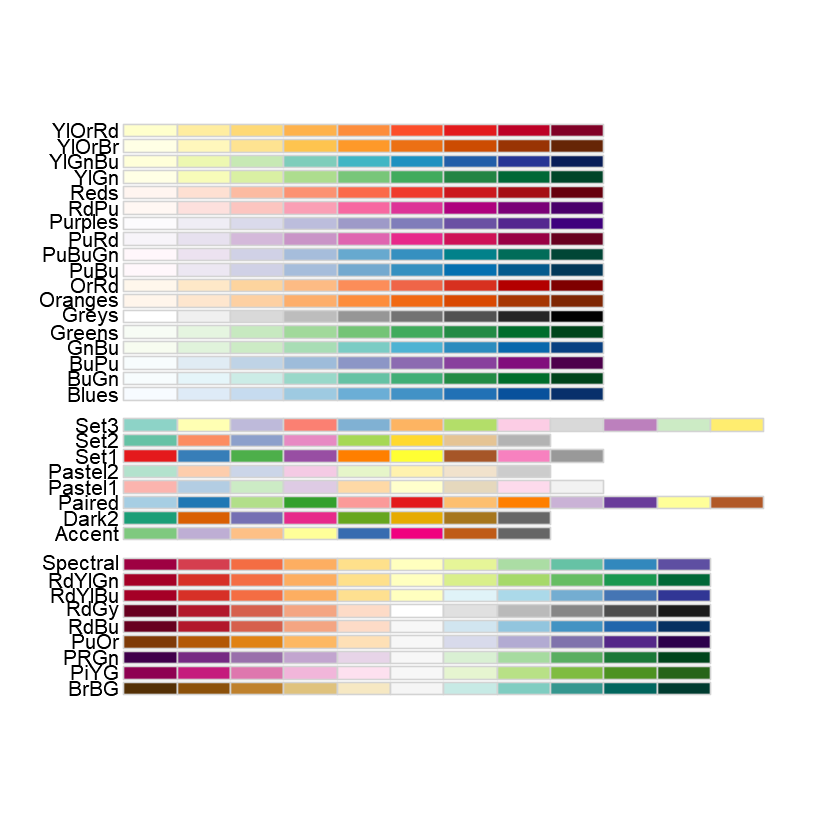

In [112]:
pal=wesanderson::wes_palette("GrandBudapest1",4, type = "discrete")
pal[1:5]
RColorBrewer::display.brewer.all()

RColorBrewer::brewer.pal(12, "YlGn")

In [116]:
p1=Heatmap(as.matrix(mat[,2:ncol(mat)]) ,row_names_side = "left",            
           cluster_columns = FALSE,#cluster_rows = FALSE ,
           show_row_dend = FALSE,
           column_order=rownames(anno),
           column_split = factor(anno$PatientID,levels=unique(anno$PatientID)),
           column_labels = anno$Timepoints,
           column_names_side = "top",
           gap = unit(1, "cm"),heatmap_legend_param = list(title = "VAF"),
           #col = circlize::colorRamp2(c(0,0.1,1,50),c("grey90","white","pink","red")),
           col = circlize::colorRamp2(c(0,0.1,1,50),c("grey90","white","#ED7953FF","#9C179EFF")),
           #col = plasma(100),
           top_annotation = HeatmapAnnotation(FLT3ITD = unlist(anno["FLT3ITD"]),                
                                              `DUP98-NSD1`=unlist(anno["DUP98-NSD1"]),                     
                                              `DUP98-HXD13` =unlist(anno["DUP98-HXD13"]),                      
                                              `MLL-PTD`=unlist(anno["MLL-PTD"]),                      
                                              Blast=unlist(anno["Blast"]),
                                              col = list(FLT3ITD=c('sITD'='#5BBCD6','mITD'='#FD6467'), #FLT3ITD=c('WT'='#4DAF4A','sITD'='#377EB8','mITD'='#E41A1C')                                  
                                                         `DUP98-NSD1` = c("Mutant" = "#7570B3","WT" = "grey90"),                                                                 
                                                         `DUP98-HXD13` = c("Mutant" = "#7570B3","WT" = "grey90"),                                
                                                         `MLL-PTD` = c("Mutant" = "#7570B3","WT" = "grey90"),                                 
                                                         Blast=circlize::colorRamp2(c(0,50),c("white","#78C679"))                                 
                                                        ),                                   
                                              annotation_name_side = "left",simple_anno_size = unit(0.3,"cm"))
          )

pdf(paste0(suppdir,"./4CNV/plot/Figure.SNV_heatmap.v2.pdf"),width=6,height=5)
draw(p1)
dev.off()

png 
  2

In [ ]:
#fig4e

In [5]:
##CNV loh plot: AP03
cnv_dir ='D:/Project/project_yangjy_NR/4.Postprocess/8integration/4Rcircos/file/'

In [6]:
c3_1 = read.table(paste0(cnv_dir,'NR5_forRegionAndBreakPoint/D0/NR5_1D0_Mutect2_allelic_states.txt'),header=T,sep='\t') %>% 
     filter(Chromosome != 'chrY') %>% mutate(Chromosome = gsub('chr','',Chromosome))
c3_2 = read.table(paste0(cnv_dir,'NR5_forRegionAndBreakPoint/6D30/NR5_6D30_Mutect2_allelic_states.txt'),header=T,sep='\t') %>% 
     filter(Chromosome != 'chrY') %>% mutate(Chromosome = gsub('chr','',Chromosome))


In [64]:
pdf(paste0(suppdir,"./4CNV/plot/Figure.p03_cnv.pdf"),width=8,height=6)
par(mfrow=c(2, 1), mar=c(5, 4, 4, 2)+0.1)
.genome.view(c3_1)
.genome.view(c3_2)
dev.off()

png 
  2

In [ ]:
#supplementary fig

In [8]:
#supp.fig
c1_1 = read.table(paste0(cnv_dir,'Lxf_forRegionAndBreakPoint/D0/Lxf_1D0_Mutect2_allelic_states.txt'),header=T,sep='\t') %>% 
     filter(Chromosome != 'chrY') %>% mutate(Chromosome = gsub('chr','',Chromosome))
c1_2 = read.table(paste0(cnv_dir,'Lxf_forRegionAndBreakPoint/1D26/Lxf_1D26_Mutect2_allelic_states.txt'),header=T,sep='\t') %>% 
     filter(Chromosome != 'chrY') %>% mutate(Chromosome = gsub('chr','',Chromosome))
c1_3 = read.table(paste0(cnv_dir,'Lxf_forRegionAndBreakPoint/3D26/Lxf_3D26_Mutect2_allelic_states.txt'),header=T,sep='\t') %>% 
     filter(Chromosome != 'chrY') %>% mutate(Chromosome = gsub('chr','',Chromosome))

c2_1 = read.table(paste0(cnv_dir,'WY_forRegionAndBreakPoint/D0/WY_1D0_Mutect2_allelic_states.txt'),header=T,sep='\t') %>% 
     filter(Chromosome != 'chrY') %>% mutate(Chromosome = gsub('chr','',Chromosome))
c2_2 = read.table(paste0(cnv_dir,'WY_forRegionAndBreakPoint/2D60/WY_2D60_Mutect2_allelic_states.txt'),header=T,sep='\t') %>% 
     filter(Chromosome != 'chrY') %>% mutate(Chromosome = gsub('chr','',Chromosome))
c2_3 = read.table(paste0(cnv_dir,'WY_forRegionAndBreakPoint/3D30/WY_3D30_Mutect2_allelic_states.txt'),header=T,sep='\t') %>% 
     filter(Chromosome != 'chrY') %>% mutate(Chromosome = gsub('chr','',Chromosome))

c4_1 = read.table(paste0(cnv_dir,'ZEM_forRegionAndBreakPoint/D0/ZEM_1D0_Mutect2_allelic_states.txt'),header=T,sep='\t') %>% 
     filter(Chromosome != 'chrY') %>% mutate(Chromosome = gsub('chr','',Chromosome))
c4_2 = read.table(paste0(cnv_dir,'ZEM_forRegionAndBreakPoint/3D30/ZEM_3D30_Mutect2_allelic_states.txt'),header=T,sep='\t') %>% 
     filter(Chromosome != 'chrY') %>% mutate(Chromosome = gsub('chr','',Chromosome))

c5_1 = read.table(paste0(cnv_dir,'GSH_forRegionAndBreakPoint/D0/GSH_1D0_Mutect2_allelic_states.txt'),header=T,sep='\t') %>% 
     filter(Chromosome != 'chrY') %>% mutate(Chromosome = gsub('chr','',Chromosome))
c5_2 = read.table(paste0(cnv_dir,'GSH_forRegionAndBreakPoint/2D30/GSH_2D30_Mutect2_allelic_states.txt'),header=T,sep='\t') %>% 
     filter(Chromosome != 'chrY') %>% mutate(Chromosome = gsub('chr','',Chromosome))

c6_1 = read.table(paste0(cnv_dir,'XF_forRegionAndBreakPoint/D0/XF_1D0_Mutect2_allelic_states.txt'),header=T,sep='\t') %>% 
     filter(Chromosome != 'chrY') %>% mutate(Chromosome = gsub('chr','',Chromosome))
c6_2 = read.table(paste0(cnv_dir,'XF_forRegionAndBreakPoint/4D30/XF_4D30_Mutect2_allelic_states.txt'),header=T,sep='\t') %>% 
     filter(Chromosome != 'chrY') %>% mutate(Chromosome = gsub('chr','',Chromosome))




In [22]:
c1_1 %>% head()

,Sample,Chromosome,Start,End,Copy_Nr_Raw,CopyNr,A,B,LOH,Theta,Theta_Exp,n_SNPs,Is_Subclonal_CN,Subclonal_P_value,Is_Inconsistent_State
,<chr>,<chr>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>,<int>
1,Lxf_1D0_Mutect2,1,10001,142536938,2.02267,2,1,1,0,0.153846,0.141356,75728,0,0.40503700,0
2,Lxf_1D0_Mutect2,1,142536939,148937742,2.03261,2,2,0,1,0.466667,0.500250,10565,0,0.02516220,0
3,Lxf_1D0_Mutect2,1,148937743,249240581,2.04015,2,1,1,0,0.153846,0.141356,66746,0,0.40503700,0
4,Lxf_1D0_Mutect2,2,10001,89832606,2.04233,2,1,1,0,0.151515,0.141356,58998,0,0.49824200,0
5,Lxf_1D0_Mutect2,2,89832607,92322606,1.95128,2,2,0,1,0.458333,0.500250,3124,0,0.00519867,0
6,Lxf_1D0_Mutect2,2,92322607,243189485,2.05606,2,1,1,0,0.151515,0.141356,88239,0,0.49824200,0


In [21]:
pdf(paste0(suppdir,"./4CNV/plot/SFig4.3_cnv3.pdf"),width=16,height=12)
par(mfrow=c(6, 2), mar=c(5, 4, 4, 2)+0.1)
.genome.view(c1_1, main = 'AP01_D0')
.genome.view(c2_1, main = 'AP02_D0')
.genome.view(c1_2, main = 'AP01_R1')
.genome.view(c2_2, main = 'AP02_R1')
.genome.view(c1_3, main = 'AP01_R2')
.genome.view(c2_3, main = 'AP02_R2')
.genome.view(c4_1, main = 'AP04_D0')
.genome.view(c5_1, main = 'AP05_D0')
.genome.view(c4_2, main = 'AP04_R2')
.genome.view(c5_2, main = 'AP05_R2')
.genome.view(c6_1, main = 'AP06_D0')
.genome.view(c6_2, main = 'AP06_R2')
dev.off()

png 
  2

In [18]:
.genome.view<-function (seg.cn, info.type = "AB", ...) 
{
    chr.order <- unique(seg.cn$Chromosome)
    seg.list <- split(x = seg.cn[, c("Chromosome", "Start", 
        "End", "A", "B", "CopyNr")], f = seg.cn$Chromosome)
    seg.list <- seg.list[order(order(chr.order))]
    seg.max <- lapply(X = seg.list, FUN = function(x) x[nrow(x), 
        "End"])
    seg.pos <- lapply(seg.list, "[", TRUE, c("Start", "End"))
    seg.max <- cumsum(as.numeric(do.call(rbind, seg.max)))
    chr.offset <- 0
    for (i in 1:length(seg.pos)) {
        seg.pos[[i]] <- seg.pos[[i]] + chr.offset
        colnames(seg.pos[[i]]) <- c("abs.start", "abs.end")
        chr.offset <- seg.max[i]
    }
    seg.max <- sapply(X = seg.pos, FUN = function(x) x[nrow(x), 
        "abs.end"])
    abs.list <- mapply(cbind, seg.list, seg.pos, SIMPLIFY = FALSE)
    abs.segments <- do.call(rbind, abs.list)
    if (info.type == "AB") {
        na_As <- is.na(abs.segments$A)
        max_A <- max(abs.segments$A, na.rm = TRUE)
        if(max_A<2) max_A = 2
        abs.segments$A[na_As] <- abs.segments$CNt[na_As]
        plot(x = c(min(abs.segments$abs.start), max(abs.segments$abs.end)), 
            y = c(-0.1, (max_A + 0.1)), type = "n", ylab = "Copy number", 
            xlab = "Position (Mb)", xaxt = "n", yaxt = "n", xaxs = "i", 
            ...)
        axis(labels = 0:max_A, at = 0:max_A, side = 2, line = 0, 
            las = 1)
        segments(x0 = abs.segments$abs.start, x1 = abs.segments$abs.end, 
            y0 = (abs.segments$B - 0.075), y1 = (abs.segments$B - 0.075), 
                 col = "blue", lwd = 5, lend = 1)
        segments(x0 = abs.segments$abs.start, x1 = abs.segments$abs.end, 
            y0 = (abs.segments$A + 0.075), y1 = (abs.segments$A + 0.075), 
                 col = "red", lwd = 5, lend = 1)
    }
    else {
        min_CNt <- min(abs.segments$CopyNr, na.rm = TRUE)
        max_CNt <- max(abs.segments$CopyNr, na.rm = TRUE)
        plot(x = c(min(abs.segments$abs.start), max(abs.segments$abs.end)), 
            y = c(min_CNt, max_CNt), type = "n", ylab = "Copy number", 
            xlab = "Position (Mb)", xaxt = "n", yaxt = "n", xaxs = "i", 
            ...)
        axis(labels = min_CNt:max_CNt, at = min_CNt:max_CNt, 
            side = 2, line = 0, las = 1)
        segments(x0 = abs.segments$abs.start, x1 = abs.segments$abs.end, 
            y0 = abs.segments$CNt, y1 = abs.segments$CNt, col = "red", 
            lwd = 5, lend = 1)
    }
    abline(v = c(0, seg.max), lty = 3)
    for (i in 1:length(abs.list)) {
        max.pos <- nrow(abs.list[[i]])
        mtext(chr.order[i], side = 3, line = 0, at = sum(abs.list[[i]]$abs.start[1], 
            abs.list[[i]]$abs.end[max.pos])/2)
    }
    axis(labels = as.character(round(seq(abs.list[[1]]$Start[1]/1e+06, 
        abs.list[[1]]$End[nrow(abs.list[[1]])]/1e+06, by = 50), 
        0)), at = seq(abs.list[[1]]$abs.start[1], abs.list[[1]]$abs.end[nrow(abs.list[[1]])], 
        by = 5e+07), outer = FALSE, cex = par("cex.axis") * par("cex") * 0.5, 
        side = 1, line = 1)
}
